# Assignment 1 - Group 8


## Load Data

In [20]:
import pandas as pd
# pd.reset_option("display.max_colwidth", None)
url = "https://storage.googleapis.com/adsp-nlp-open/data/Food_Inspections_20250325.csv"
data = pd.read_csv(url)

In [21]:
print(data.shape)
data.head()

(288942, 17)


,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,1068208,CHINA COURT RESTAURANT,CHINA COURT RESTAURANT,2141795.0,Restaurant,Risk 1 (High),1146 N MILWAUKEE AVE,CHICAGO,IL,60642.0,03/14/2012,License Re-Inspection,Fail,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.902462,-87.665306,"(41.902462266949634, -87.66530609467256)"
1,1072213,CUDDLE CARE,CUDDLE CARE,1622366.0,Daycare Above and Under 2 Years,Risk 1 (High),4800 S LAKE PARK AVE,CHICAGO,IL,60615.0,10/22/2012,Canvass,Pass,31. CLEAN MULTI-USE UTENSILS AND SINGLE SERVIC...,41.807922,-87.590693,"(41.80792179224785, -87.5906931090992)"
2,1072214,CUDDLE CARE,CUDDLE CARE,1622365.0,Daycare Above and Under 2 Years,Risk 1 (High),4800 S LAKE PARK AVE,CHICAGO,IL,60615.0,10/22/2012,Canvass,Pass,31. CLEAN MULTI-USE UTENSILS AND SINGLE SERVIC...,41.807922,-87.590693,"(41.80792179224785, -87.5906931090992)"
3,1072228,SHARKS FISH & CHICKEN,SHARKS FISH & CHICKEN,2069562.0,Restaurant,Risk 2 (Medium),101 E 51ST ST,CHICAGO,IL,60615.0,10/26/2012,Short Form Complaint,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.801892,-87.622566,"(41.80189221533366, -87.62256558837282)"
4,1072252,SALAAM RESTAURANT AND BAKERY,SALAAM RESTAURANT AND BAKERY,2141327.0,Restaurant,Risk 1 (High),700-706 W 79TH ST,CHICAGO,IL,60620.0,01/24/2013,Canvass,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.750787,-87.641667,"(41.750787498480555, -87.64166664542023)"


## 1. Select only the records corresponding to failed inspections (see the "results" column).

In [22]:
# data_failed = data[data['Results'] == 'Fail']
data_failed = data.loc[data['Results'] == 'Fail'].copy()
print(data_failed.shape)
data_failed.head(5)

(56090, 17)


,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,1068208,CHINA COURT RESTAURANT,CHINA COURT RESTAURANT,2141795.0,Restaurant,Risk 1 (High),1146 N MILWAUKEE AVE,CHICAGO,IL,60642.0,03/14/2012,License Re-Inspection,Fail,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.902462,-87.665306,"(41.902462266949634, -87.66530609467256)"
5,1072529,GRESHAM ELEMENTARY SCHOOL,GRESHAM ELEMENTARY SCHOOL,23451.0,School,Risk 1 (High),8524 S Green (832W),CHICAGO,IL,60620.0,09/05/2013,Canvass,Fail,12. HAND WASHING FACILITIES: WITH SOAP AND SAN...,41.738913,-87.645062,"(41.73891334027122, -87.6450616939937)"
6,1084236,THE JIBARITO STOP,THE JIBARITO STOP,2156722.0,Mobile Food Dispenser,Risk 3 (Low),2007-2009 S DAMEN AVE,CHICAGO,IL,60608.0,05/25/2012,License,Fail,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.854695,-87.675765,"(41.854694701707345, -87.67576513516751)"
7,1084239,MANJARES AL EXPRESS,MANJARES AL EXPRESS,2021538.0,Restaurant,Risk 1 (High),2226-2230 S ASHLAND AVE,CHICAGO,IL,60608.0,05/29/2012,Complaint,Fail,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...,41.851398,-87.666166,"(41.851397799712196, -87.66616621226514)"
8,1084242,CHISCREAM,CHISCREAM,2152278.0,Mobile Food Dispenser,Risk 3 (Low),324 N LEAVITT ST,CHICAGO,IL,60612.0,06/04/2012,License,Fail,"1. SOURCE SOUND CONDITION, NO SPOILAGE, FOODS ...",41.887434,-87.681849,"(41.88743405025222, -87.68184949426895)"


## 2. Use regular expressions to extract the regulation description and inspector comments from the "violations" columns. Every record representations a restaurant inspection. The "violations" column contains "|"-separated violations encountered during inspection (there can be more than one violation during a given inspection). Each violation generally consists of a regulation code, regulation description, and comments describing how the regulation was violated.


In [4]:
import re

# pattern = r'(?:^|\|)\s*(\d+)\.\s*(.*?)\s*- Comments:\s+(.*?[\.])'
# pattern = r'(?:^|\|)\s*(\d+)\.\s*(.*?)\s*- Comments:\s+(.*?)(?=\s*\|\s*\d+\.|$)'

pattern = re.compile(
    r'(?:^|\|)\s*(\d+)\.\s*'           # code like 37.
    r'(.*?)\s*'                       # description
    r'(?:-\s*Comments:\s*(.*?))?'     # OPTIONAL comments block
    r'(?=\s*\|\s*\d+\.|$)',           # stop at next code or end
    flags=re.DOTALL
)
temp = []
for text in (data_failed.iloc[:2,13]):
    matches = re.findall(pattern, text)
    print(matches)

[('18', 'NO EVIDENCE OF RODENT OR INSECT OUTER OPENINGS PROTECTED/RODENT PROOFED, A WRITTEN LOG SHALL BE MAINTAINED AVAILABLE TO THE INSPECTORS', 'FOUND NO PEST CONTROL LOG BOOK ON PREMISES,FRONT/REAR DOORS TO PREMISES WITH 1/4" MODE OF ENTRY.MUST PROVIDE PEST CONTROL LOG BOOK,RODENT PROOF SAID DOORS ALL ACROSS THE BOTTOMS.'), ('32', 'FOOD AND NON-FOOD CONTACT SURFACES PROPERLY DESIGNED, CONSTRUCTED AND MAINTAINED', 'SPLASHGUARD AT FRONT EXPOSED HANDSINK IS MISSING MUST PROVIDE,SINK STOPPERS ARE NEEDED FOR THE 3 COMPARTMENT SINK.'), ('41', 'PREMISES MAINTAINED FREE OF LITTER, UNNECESSARY ARTICLES, CLEANING  EQUIPMENT PROPERLY STORED', 'DETAIL CLEAN,ORGANIZE REAR STORAGE AREAS AND REMOVE ALL CLUTTER/UNUSED KITCHEN EQUIPMENTS DUE TO POTENTIAL PEST HARBORAGE.')]
[('12', 'HAND WASHING FACILITIES: WITH SOAP AND SANITARY HAND DRYING DEVICES, CONVENIENT AND ACCESSIBLE TO FOOD PREP AREA', 'NO SOAP FOR HAND WASHING IN STAFF RESTROOM. INSTRUCTED TO PROVIDE.  CRITICAL VIOLATION 7-38-030.'), ('18'

In [5]:
data_violations = data_failed['Violations'].str.extractall(pattern)
data_violations.reset_index(inplace=True)
data_violations.columns = ['index','match_id','violation_code','violation_desc','comment']
data_violations["comment"] = data_violations["comment"].fillna("") ## Some violations don't have comments. It is possible for them to have null value.

In [25]:
sanity_check = pd.DataFrame(data_violations[['violation_code', 'violation_desc']].value_counts()).reset_index()

,violation_code,violation_desc,count
0,55,"PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN",23229
1,34,"FLOORS: CONSTRUCTED PER CODE, CLEANED, GOOD RE...",19371
2,35,"WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTRUCTE...",18257
3,33,FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSILS C...,16445
4,18,NO EVIDENCE OF RODENT OR INSECT OUTER OPENINGS...,16432
5,38,VENTILATION: ROOMS AND EQUIPMENT VENTED AS REQ...,15529
6,32,FOOD AND NON-FOOD CONTACT SURFACES PROPERLY DE...,15019
7,38,"INSECTS, RODENTS, & ANIMALS NOT PRESENT",12974
8,10,ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED A...,12270
9,41,"PREMISES MAINTAINED FREE OF LITTER, UNNECESSAR...",10667


In [48]:
sanity_check['violation_code'].value_counts()[sanity_check['violation_code'].value_counts() > 1]

violation_code
11    2
43    2
19    2
37    2
16    2
39    2
24    2
34    2
31    2
25    2
22    2
1     2
14    2
23    2
45    2
12    2
42    2
13    2
8     2
9     2
28    2
44    2
2     2
21    2
36    2
30    2
35    2
33    2
18    2
38    2
32    2
10    2
41    2
17    2
7     2
20    2
6     2
5     2
3     2
29    2
4     2
27    2
15    2
40    2
Name: count, dtype: int64

Some violation codes have inconsistent description. Since we can't know for sure if the code is correctly assign(or it is possible the code changed over the years), we are going to use description as source of truth.

In [49]:
sanity_check[sanity_check['violation_code'] == '43']

,violation_code,violation_desc,count
42,43,"FOOD (ICE) DISPENSING UTENSILS, WASH CLOTHS PROPERLY STORED",2241
60,43,IN-USE UTENSILS: PROPERLY STORED,989


In [50]:
sanity_check[sanity_check['violation_code'] == '19']

,violation_code,violation_desc,count
28,19,"OUTSIDE GARBAGE WASTE GREASE AND STORAGE AREA; CLEAN, RODENT PROOF, ALL CONTAINERS COVERED",3887
94,19,PROPER REHEATING PROCEDURES FOR HOT HOLDING,29


In [51]:
data_failed.loc[data_failed['Violations'].str.startswith(r'19. OUTSIDE GARBAGE WASTE', na=False),['Violations']].head(1)

,Violations
63,"19. OUTSIDE GARBAGE WASTE GREASE AND STORAGE AREA; CLEAN, RODENT PROOF, ALL CONTAINERS COVERED - Comments: OUTSIDE GARBAGE AREA NOT MAINTAINED. OBSERVED GARBAGE DIRTY: FOOD GLOVES,FOOD, PAPERS AND OTHER DEBRIS ON GROUND BEHIND AND UNDER THE GARBAGE CONTAINERS. INSTRUCTED TO CLEAN, ELEVATE WOOD PALLETS( IF NEEDED) 6"" OFF THE CEMENT FLOOR OR REMOVE THEM. ALSO ONE GARBAGE CONTAINER NOT ABLE TO CLOSE LID DUE TO OVERFLOWING GARBAGE. MUST MAINTAIN AREA CLEAN AT ALL TIMES TO MINIMIZE RODENT/INSECTS ACTIVITIES. KEEP GARBAGE LID COMPLETELY CLOSED AT ALL TIMES. SERIOUS VIOLATION: 7-38-020 | 32. FOOD AND NON-FOOD CONTACT SURFACES PROPERLY DESIGNED, CONSTRUCTED AND MAINTAINED - Comments: PROPERLY STORED ALL CLEAN DISHES IN PREP/SERVING AREA:COVER OR INVERT THEM. | 33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSILS CLEAN, FREE OF ABRASIVE DETERGENTS - Comments: CLEAN INTERIOR OF OVEN, BURNED FOOD INSIDE. | 34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOOD REPAIR, COVING INSTALLED, DUST-LESS CLEANING METHODS USED - Comments: DETAIL CLEAN FLOOR THROUGHOUT THE PREMISES SPECIALLY UNDER THE DEEP FRYER, COOKING EQUIPMENT,CORNERS AND ALONG THE WALLS: FOOD DEBRIS,AND OTHER ITEMS. | 35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTRUCTED PER CODE: GOOD REPAIR, SURFACES CLEAN AND DUST-LESS CLEANING METHODS - Comments: REPLACE MISSING WALL TILES BEHIND THE FLAT GRILL, IN PREP AREA. | 40. REFRIGERATION AND METAL STEM THERMOMETERS PROVIDED AND CONSPICUOUS - Comments: WORKING/VISIBLE THERMOMETERS IS NEEDED IN ALL COOLERS AND FREEZERS."


In [52]:
data_failed.loc[data_failed['Violations'].str.startswith(r'19. PROPER', na=False),['Violations']].head(1)

,Violations
49420,"19. PROPER REHEATING PROCEDURES FOR HOT HOLDING - Comments: NOTED EMPLOYEE REMOVED ASSORTED TCS FOOD ITEMS, MACARONI, CHEESE, JAMBOLAYE, RICE, ETC. FROM THE 2-DOOR REFRIGERATION UNIT AND PUT IT DIRECTED INTO THE WARMING UNIT WITHOUT REHEATING THE FOOD ITEMS UP TO 165F PER CODE. DISCUSSED WITH MANAGEMENT PROPER METHODS OF RAPIDLY REHEATING TCS PREPARED FOODS TO 165F OR ABOVE AND MAINTAINING AT 135F OR ABOVE. PRIORITY VIOLATION 7-38-005 CITATION ISSUED. | 47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE, PROPERLY DESIGNED, CONSTRUCTED & USED - Comments: NOTED CARDBOARD BOXES USED TO LINE SHELVES. INSTRUCTED TO CLEAN AND REMOVE ALL CARDBOARD BOXES TO PREVENT HIDING PLACES FOR PEST. | 49. NON-FOOD/FOOD CONTACT SURFACES CLEAN - Comments: NOTED THICK GREASE ACCUMULATION ISIDE THE ELECTRICAL UNIT OF THE DEEP FRYER. INSTRUCTED TO DETAIL CLEAN AND MAINTAIN. | 51. PLUMBING INSTALLED; PROPER BACKFLOW DEVICES - Comments: NOTED LEAKING PIPE AT THE BOTTOM OF THE 3-COMPARTMENT SINK AT THE REAR. INSTRUCTED TO REPAIR AND MAINTAIN. | 55. PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN - Comments: INSTRUCTED TO DETAIL CLEAN AND MAINTAIN FLOORS THROUGHOUT PREMISE, ESPECIALLY ALONG THE WALL BASE AND UNDERNEATH EQUIPMENT (COOKING STOVE, 3 COMPARTMENT SINK, DRY STORAGE AREA, AND WALK-IN COOLER), ALL ENCRUSTED WITH HEAVY DIRT, GREASE, FOOD PARTICLES, AND GRIME. | 55. PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN - Comments: NOTED DIRTY AND DUSTY CEILING FANS AND VENTS THROUGH OUT PREMISE INCLUDING FANS INSIDE THE WALK IN COOLER. INSTRUCTED TO CLEAN AND MAINTAIN. | 60. PREVIOUS CORE VIOLATION CORRECTED - Comments: NOTED THE FOLLOWING PREVIOUS CORE VIOLATION #47, #49, #49 FROM INSPECTION REPORT #2567323 DATED 11/18/2022 NOT CORRECTED. 47)..4-101.11(B, C, D, E): INTERIOR LID OF THE BOX FREEZER IN POOR REPAIR. CRACKED, BROKEN WITH EXPOSED INSULATION. MUST REPLACE. 49)..4-602.13: DIRTY/GREASY EQUIPMENT WITH FOOD DEBRIS STORED IN DRY, DRY FOOD STORAGE. MUST STORE EQUIPMENT CLEANED.\tF 49)..4-601.11(B): INTERIOR OF ALL COOLERS AND FREEZERS WITH EXCESSIVE FOOD DEBRIS AND ICE BUILD-UP. MUST CLEAN, DEFROST AND MAINTAIN. INSTRUCTED MANAGEMENT THAT ALL FOOD SERVICE MANAGERS ARE REQUIRED TO HAVE THE ALLERGEN TRAINING CERTIFICATION. PRIORITY FOUNDATION VIOLATION #7-42-090. CITATION ISSUED"


In [36]:
sanity_check.head(10)

,violation_code,violation_desc,count
0,55,"PHYSICAL FACILITIES INSTALLED, MAINTAINED & CLEAN",23229
1,34,"FLOORS: CONSTRUCTED PER CODE, CLEANED, GOOD RE...",19371
2,35,"WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTRUCTE...",18257
3,33,FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSILS C...,16445
4,18,NO EVIDENCE OF RODENT OR INSECT OUTER OPENINGS...,16432
5,38,VENTILATION: ROOMS AND EQUIPMENT VENTED AS REQ...,15529
6,32,FOOD AND NON-FOOD CONTACT SURFACES PROPERLY DE...,15019
7,38,"INSECTS, RODENTS, & ANIMALS NOT PRESENT",12974
8,10,ADEQUATE HANDWASHING SINKS PROPERLY SUPPLIED A...,12270
9,41,"PREMISES MAINTAINED FREE OF LITTER, UNNECESSAR...",10667


## 3. Count how many times each regulation description occurred in the table and visualize the top 10 most frequent regulation descriptions.

/var/folders/f3/cbkd23fs1hd10bsxhdnc48jm0000gp/T/ipykernel_39076/3711828395.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


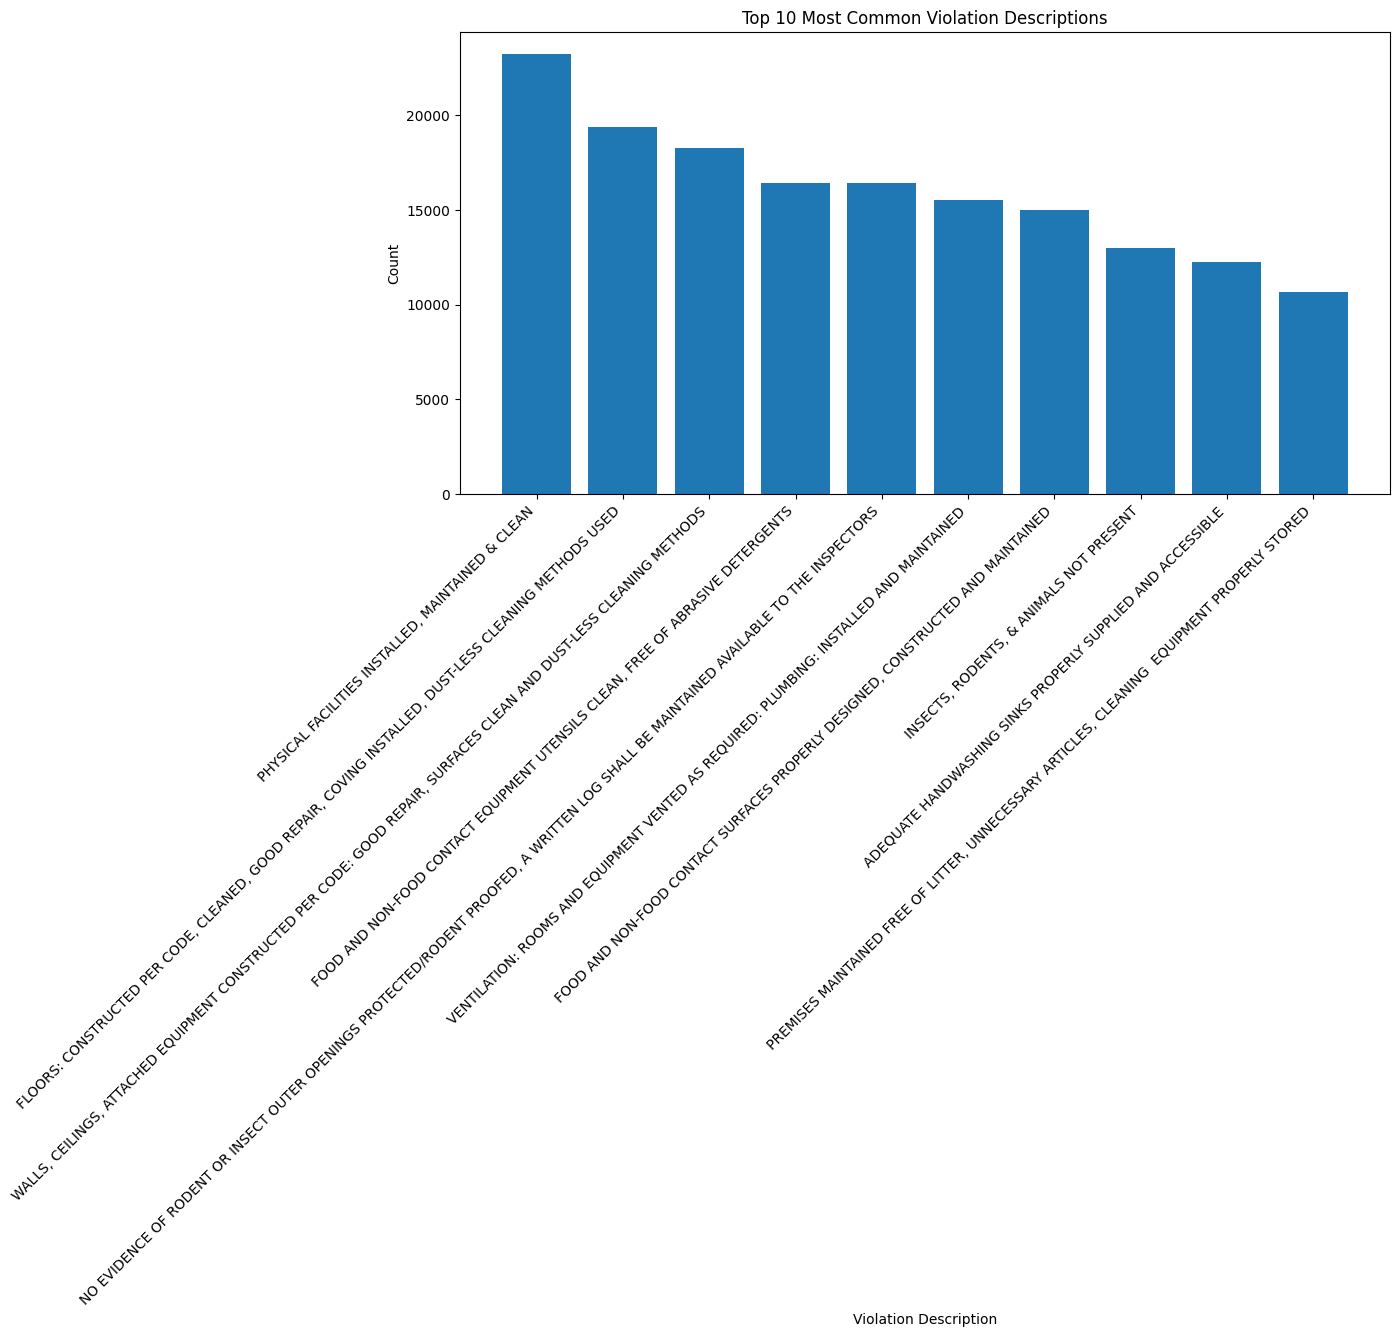

In [53]:
import matplotlib.pyplot as plt

top10 = data_violations['violation_desc'].value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.bar(range(len(top10)), top10.values)

plt.xticks(
    range(len(top10)),
    top10.index,
    rotation=45,
    ha='right'
)

plt.title('Top 10 Most Common Violation Descriptions')
plt.ylabel('Count')
plt.xlabel('Violation Description')

plt.tight_layout()
plt.show()

## 4. Tokenize the comments and provide a count of the top 10:



In [6]:
import string
import nltk
from nltk.corpus import wordnet, stopwords
from nltk.tokenize import(
    word_tokenize,
    wordpunct_tokenize,
    WhitespaceTokenizer,
    RegexpTokenizer,
    sent_tokenize
)

In [10]:
from collections import Counter

def top_n_tokens(token_series, n=10):
    """
    Compute top-N most common tokens from a pandas Series of token lists.

    Parameters
    ----------
    token_series : pd.Series
        Each row contains a list of tokens
    n : int, default=10
        Number of top tokens to return

    Returns
    -------
    list of tuples
        [(token, count), ...]
    """
    token_counts = Counter(
        token
        for tokens in token_series
        for token in tokens
    )
    return pd.DataFrame(
        token_counts.most_common(n),
        columns=["Token", "Count"]
    )

### 1. Raw tokens

In [56]:
data_violations

,index,match_id,violation_code,violation_desc,comment
0,0,0,18,"NO EVIDENCE OF RODENT OR INSECT OUTER OPENINGS PROTECTED/RODENT PROOFED, A WRITTEN LOG SHALL BE MAINTAINED AVAILABLE TO THE INSPECTORS","FOUND NO PEST CONTROL LOG BOOK ON PREMISES,FRONT/REAR DOORS TO PREMISES WITH 1/4"" MODE OF ENTRY.MUST PROVIDE PEST CONTROL LOG BOOK,RODENT PROOF SAID DOORS ALL ACROSS THE BOTTOMS."
1,0,1,32,"FOOD AND NON-FOOD CONTACT SURFACES PROPERLY DESIGNED, CONSTRUCTED AND MAINTAINED","SPLASHGUARD AT FRONT EXPOSED HANDSINK IS MISSING MUST PROVIDE,SINK STOPPERS ARE NEEDED FOR THE 3 COMPARTMENT SINK."
2,0,2,41,"PREMISES MAINTAINED FREE OF LITTER, UNNECESSARY ARTICLES, CLEANING EQUIPMENT PROPERLY STORED","DETAIL CLEAN,ORGANIZE REAR STORAGE AREAS AND REMOVE ALL CLUTTER/UNUSED KITCHEN EQUIPMENTS DUE TO POTENTIAL PEST HARBORAGE."
3,5,0,12,"HAND WASHING FACILITIES: WITH SOAP AND SANITARY HAND DRYING DEVICES, CONVENIENT AND ACCESSIBLE TO FOOD PREP AREA",NO SOAP FOR HAND WASHING IN STAFF RESTROOM. INSTRUCTED TO PROVIDE. CRITICAL VIOLATION 7-38-030.
4,5,1,18,"NO EVIDENCE OF RODENT OR INSECT OUTER OPENINGS PROTECTED/RODENT PROOFED, A WRITTEN LOG SHALL BE MAINTAINED AVAILABLE TO THE INSPECTORS","OBSERVED 30 MICE DROPPINGS UNDER RACKS, ON TOP OF BULK CONTAINERS AND AGAINST WALL IN DRY FOOD PANTRY AREA, AND IN LUNCHROOM. ALSO NOTED DOOR #3 NOT RODENT PROOF WITH 1/2"" GAP DOWN THE CENTER AND AT BOTTOM. REMOVE DROPPINGS CLEAN AND SANITIZE AFFECTED AREAS, SEAL DOOR. SERIOUS VIOLATION 7-38-020."
...,...,...,...,...,...
349079,288941,3,36,THERMOMETERS PROVIDED & ACCURATE,NOTED NO THERMOMETER ON SITE TO MONITOR THE INTERNAL FOOD TEMPERATURE OF TCS FOOD ITEMS. INSTRUCTED TO HAVE ONE AT ALL TIMES. PRIORITY FOUNDATION VIOLATION# 7-38-005. NO CITATION ISSUED.
349080,288941,4,48,"WAREWASHING FACILITIES: INSTALLED, MAINTAINED & USED; TEST STRIPS",NOTED NO SANITIZER TEST STRIP KIT ON SITE AT THE TIME OF INSPECTION. INSTRUCTED TO HAVE A TEST STRIP KIT ON SITE AT ALL TIMES TO PROPERLY MONITOR THE STRENGTH OF THE SANITIZER. PRIORITY FOUNDATION VIOLATION#7-38-005. NO CITATION ISSUED.
349081,288941,5,51,PLUMBING INSTALLED; PROPER BACKFLOW DEVICES,NOTED NO ONE COMPARTMENT SINK AT THE FRONT PREP AREA WHERE FOOD IS PREPARED. INSTRUCTED TO INSTALL A ONE COMPARTMENT SINK
349082,288941,6,57,ALL FOOD EMPLOYEES HAVE FOOD HANDLER TRAINING,NOTED EMPLOYEES AT WORK WITH NO FOOD HANDLER CERTIFICATES. INSTRUCTED MANAGEMENT THAT ALL EMPLOYEES ARE REQUIRED TO HAVE THE FOOD HANDLER CERTIFICATES ON SITE AT ALL TIMES AND ONE MONTH (30 DAYS) GRACE PERIOD FOR NEW HIRES


In [26]:
data_violations['tokens_wp'] = data_violations['comment'].apply(wordpunct_tokenize)
raw_tokens = top_n_tokens(data_violations['tokens_wp'], n=10)
raw_tokens

,token,count
0,.,915256
1,AND,415617
2,-,375059
3,",",372090
4,THE,310586
5,IN,294983
6,TO,269953
7,MUST,192246
8,OF,181354
9,ON,162125


### 2. Preprocessed tokens


In [12]:
stop_words = set(stopwords.words('english'))
punct = set(string.punctuation) 
punct.add('.')

data_violations['tokens_wp_clean'] = data_violations['tokens_wp'].apply(
    lambda tokens: [
        t.lower()
        for t in tokens
        if t not in punct
        and t.lower() not in stop_words
        and t.isalpha()
    ]
)

In [27]:
preproc_tokens = top_n_tokens(data_violations['tokens_wp_clean'], n=10)
preproc_tokens

,token,count
0,must,202006
1,instructed,166631
2,food,162142
3,observed,153113
4,clean,128306
5,area,122518
6,maintain,104000
7,prep,98353
8,sink,95562
9,provide,84902


### 3. Preprocessed tokens + Porter stemmer

In [14]:
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()
lemmatizer = nltk.WordNetLemmatizer()

In [28]:
data_violations['tokens_porter'] = data_violations['tokens_wp_clean'].apply(
    lambda tokens: [
        porter.stem(t)
        for t in tokens
    ]
)

data_violations['tokens_lanc'] = data_violations['tokens_wp_clean'].apply(
    lambda tokens: [
        lancaster.stem(t)
        for t in tokens
    ]
)

data_violations['tokens_lem'] = data_violations['tokens_wp_clean'].apply(
    lambda tokens: [
        lemmatizer.lemmatize(t)
        for t in tokens
    ]
)

prePorter_tokens = top_n_tokens(data_violations['tokens_porter'], n=10)
prePorter_tokens

,token,count
0,must,202011
1,food,191018
2,area,167002
3,instruct,166880
4,clean,157925
5,observ,153663
6,maintain,116250
7,sink,114755
8,floor,104212
9,prep,99104


### 4. Preprocessed tokens + Lancaster stemmer

In [29]:
preLancaster_tokens = top_n_tokens(data_violations['tokens_lanc'], n=10)
preLancaster_tokens

,token,count
0,must,202013
1,food,191019
2,cle,172225
3,instruct,166914
4,observ,153662
5,are,122518
6,prep,118795
7,maintain,116265
8,sink,114757
9,stor,110463


### 5. Preprocessed tokens + lemmatization

In [30]:
preLem_tokens = top_n_tokens(data_violations['tokens_lem'], n=10)
preLem_tokens

,token,count
0,must,202010
1,food,191017
2,area,167001
3,instructed,166631
4,observed,153113
5,clean,128314
6,sink,114753
7,maintain,104000
8,floor,103773
9,prep,98373


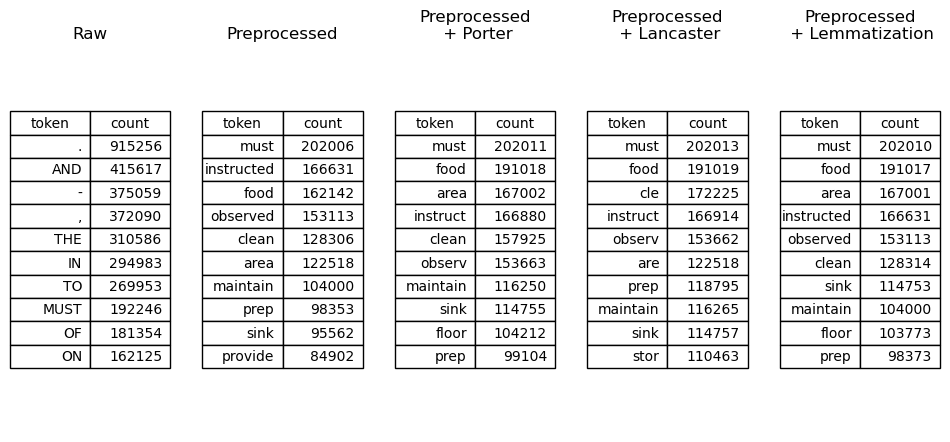

In [34]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,5, figsize=(12,5), sharey=True)

dfs = [raw_tokens, preproc_tokens, prePorter_tokens, preLancaster_tokens, preLem_tokens]
titles = ["Raw", "Preprocessed", "Preprocessed\n + Porter" , "Preprocessed\n + Lancaster", "Preprocessed\n + Lemmatization"]

for ax, df, title in zip(axes, dfs, titles):
    ax.axis("off")
    ax.set_title(title, fontsize=12)

    table = ax.table(
        cellText = df.values,
        colLabels = df.columns,
        loc="center"
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1,1.4)

plt.show()

#raw_tokens
#preproc_tokens
#prePorter_tokens
#preLancaster_tokens
#preLem_tokens

## 5. Briefly describe the differences in various tokens from (4).

## Raw Tokens
- Most of the frequent tokens consist of punctuation and stop words.
- On their own, these high-frequency tokens carry little semantic meaning.
- This occurs because tokenization was performed using simple whitespace splitting, without normalization or filtering.

## Pre-processed Tokens
- Stop words are removed and all tokens are normalized to lowercase.
- With stop words eliminated, the remaining high-frequency tokens are more semantically meaningful.
- This representation better reflects the underlying content of the text.

## Pre-processed + Porter Stemming
- Verbs and related word forms are reduced to common stems.
- For example, *observed* is reduced to *observ*.
- Stemming increases term consolidation while largely preserving interpretability.

## Pre-processed + Lancaster Stemming
- Lancaster stemming is noticeably more aggressive than Porter.
- Many words are reduced to very short stems (e.g., *area* → *are*, *clean* → *cle*).
- While this increases conflation, it can also distort semantic meaning and reduce readability.

## Pre-processed + Lemmatization
- Lemmatization largely preserves semantic meaning while normalizing word forms.
- Related forms are grouped under their base lemma (e.g., *floors* and *floor* → *floor*).
- As a result, meaningful domain-specific terms (such as *floor*) appear more prominently in the top-token list.
- This makes lemmatization more suitable when semantic interpretation matters, rather than pure frequency conflation.